# Sprint#2 - IOT, IA

Rennan Ferreira da Cruz - RM99364

Jaisy Cibele Alves - RM552269

Luiz Felipe Camargo Prendin - RM552475

Tomaz de Oliveira Pecoraro - RM98499

Gabriel Amâncio Pereira - RM97936

Bibliotecas que serão ultizadas (por enquanto):

- Pandas
- Scikit-learn
- Matplotlib






In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [10]:
data = pd.read_csv('Dados/DiaHora.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Dia             168 non-null    object
 1   Hora de início  168 non-null    int64 
 2   Impressões      168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


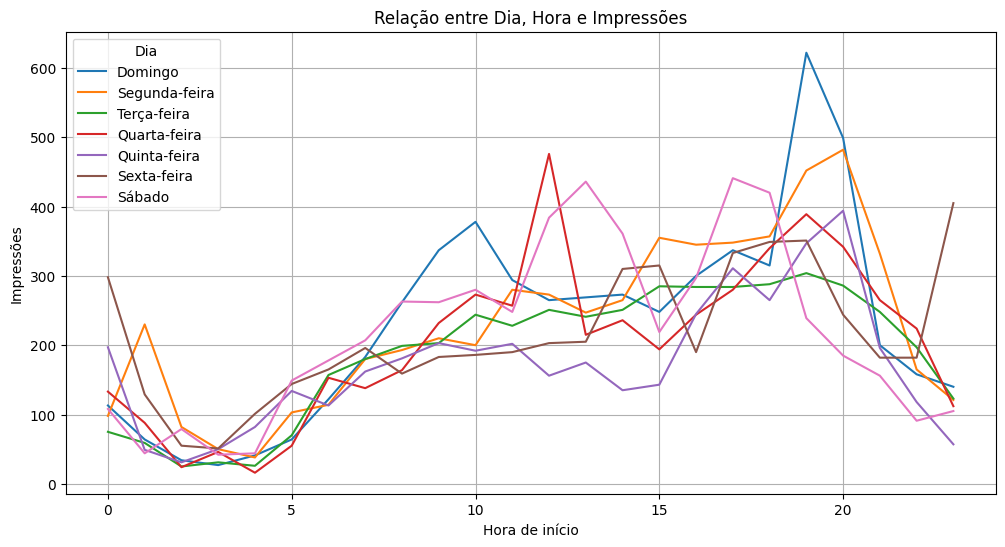

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

dias_semana = {
    'Domingo': 0,
    'Segunda-feira': 1,
    'Terça-feira': 2,
    'Quarta-feira': 3,
    'Quinta-feira': 4,
    'Sexta-feira': 5,
    'Sábado': 6
}

data['Dia_Num'] = data['Dia'].map(dias_semana)

data.sort_values(by=['Dia_Num', 'Hora de início'], inplace=True)

plt.figure(figsize=(12, 6))
for dia_num in range(7):
    dia = list(dias_semana.keys())[dia_num]
    grupo = data[data['Dia_Num'] == dia_num]
    plt.plot(grupo['Hora de início'], grupo['Impressões'], label=dia)

plt.xlabel('Hora de início')
plt.ylabel('Impressões')
plt.title('Relação entre Dia, Hora e Impressões')
plt.legend(title='Dia')
plt.grid(True)
plt.show()





---


## Dados de Palavras Chaves

In [13]:
chaves = pd.read_csv('Dados/PalavrasChaves.csv')

In [14]:
chaves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Palavra-chave da rede de pesquisa  50 non-null     object
 1   Tipo de corresp.                   50 non-null     object
 2   Status do critério                 50 non-null     object
 3   Status da campanha                 50 non-null     object
 4   Status do grupo de anúncios        50 non-null     object
 5   Custo                              50 non-null     object
 6   Cliques                            50 non-null     int64 
 7   CTR                                50 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.2+ KB


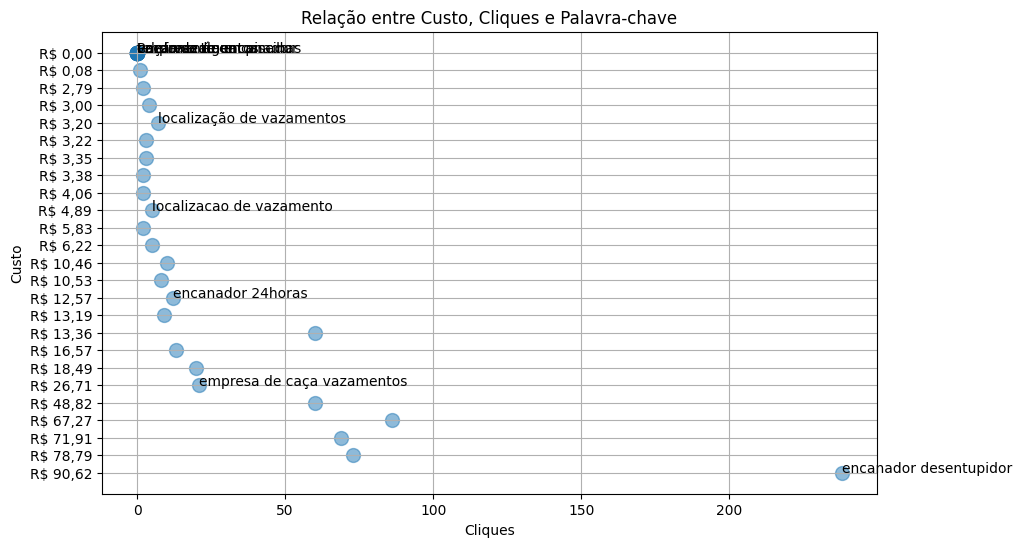

In [15]:
# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(chaves['Cliques'], chaves['Custo'], s=100, alpha=0.5)
plt.xlabel('Cliques')
plt.ylabel('Custo')

# Adicionar rótulos para algumas palavras-chave para tornar o gráfico mais legível
for i in range(len(chaves)):
    if i % 5 == 0:  # Adicionar rótulos a cada 5 pontos para evitar aglomeração
        plt.text(chaves['Cliques'][i], chaves['Custo'][i], chaves['Palavra-chave da rede de pesquisa'][i])

plt.title('Relação entre Custo, Cliques e Palavra-chave')
plt.grid(True)
plt.show()

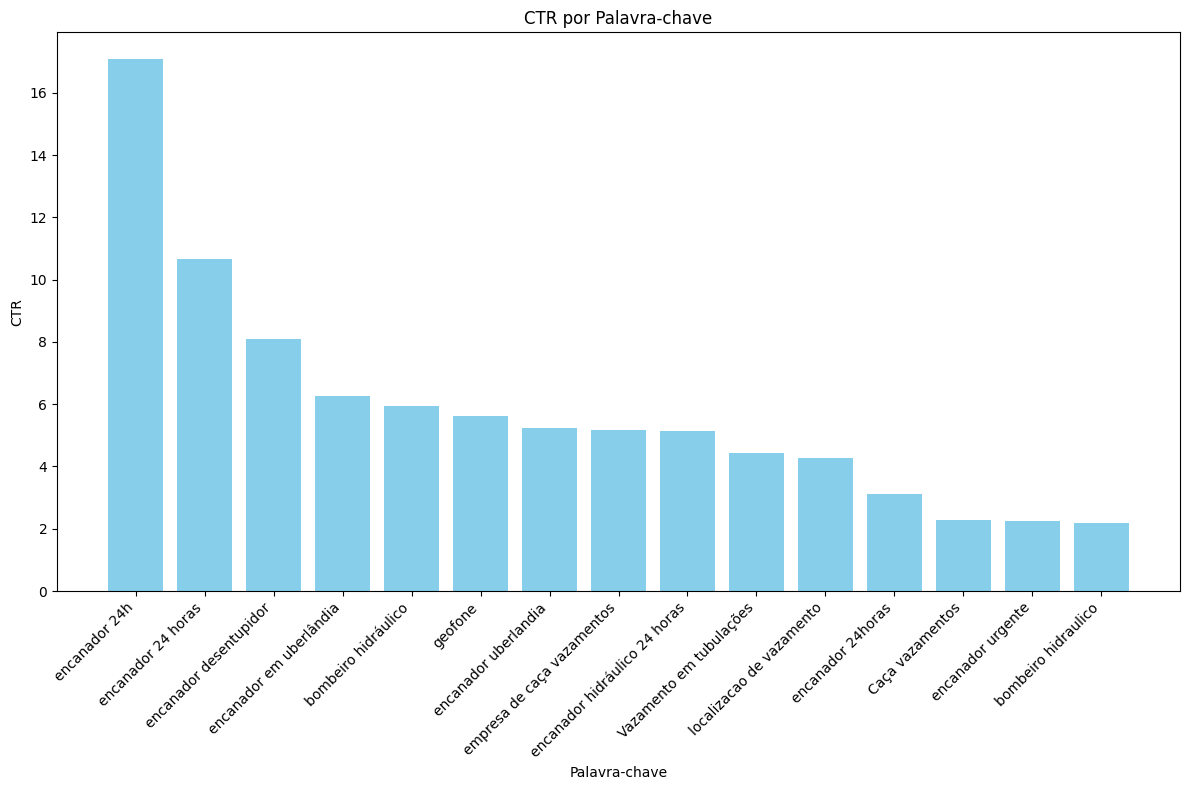

In [ ]:

# Remover o símbolo de porcentagem e converter para float
chaves['CTR'] = chaves['CTR'].str.rstrip('%').str.replace(',', '.').astype(float)

# Ordenar as palavras-chave pelo CTR (Taxa de Clique)
chaves = chaves.sort_values(by='CTR', ascending=False)

# Limitar o número de palavras-chave para facilitar a visualização
chaves = chaves.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(chaves['Palavra-chave da rede de pesquisa'], chaves['CTR'], color='skyblue')
plt.xlabel('Palavra-chave')
plt.ylabel('CTR')
plt.title('CTR por Palavra-chave')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Dados de Pesquisa 1

---



In [ ]:
pesquisa1 = pd.read_csv('Dados/Pesquisas1.csv')

In [ ]:
pesquisa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Palavra                             300 non-null    object
 1   Custo                               300 non-null    object
 2   Cliques                             300 non-null    int64 
 3   Impressões                          300 non-null    int64 
 4   Conversões                          300 non-null    object
 5   Principais consultas com a palavra  300 non-null    object
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


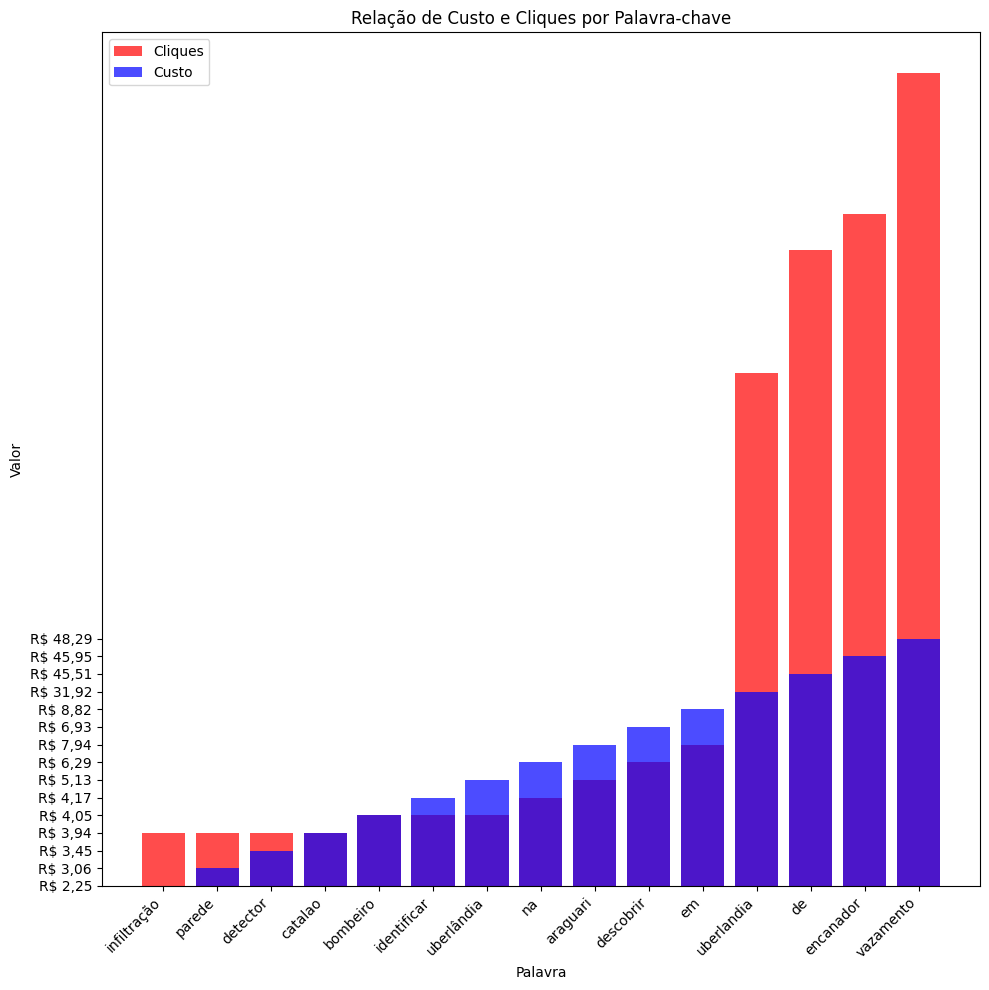

In [ ]:
# Ordenando os dados por custo decrescente
pesquisa1 = pesquisa1.sort_values(by='Custo')
pesquisa1 = pesquisa1.sort_values(by='Cliques')

# Limitando o número de palavras-chave para facilitar a visualização
pesquisa1 = pesquisa1.head(20)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 10))
plt.bar(pesquisa1['Palavra'], pesquisa1['Cliques'], color='red', alpha=0.7, label='Cliques')
plt.bar(pesquisa1['Palavra'], pesquisa1['Custo'], color='blue', alpha=0.7, label='Custo')
plt.xlabel('Palavra')
plt.ylabel('Valor')
plt.title('Relação de Custo e Cliques por Palavra-chave')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



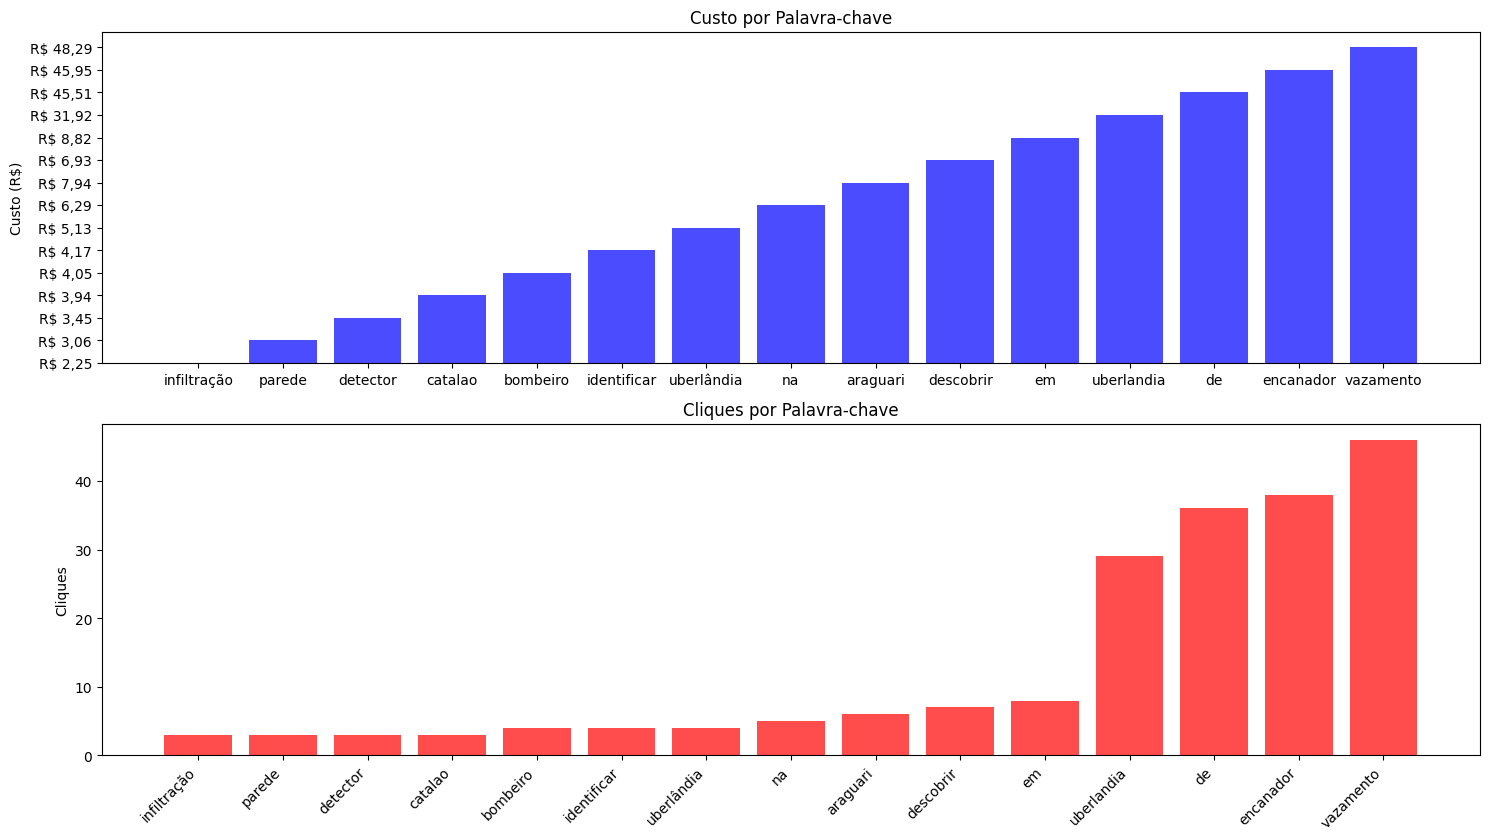

In [ ]:
# Ordenando os dados por custo decrescente
pesquisa1 = pesquisa1.sort_values(by='Custo')
pesquisa1 = pesquisa1.sort_values(by='Cliques')

# Limitando o número de palavras-chave para facilitar a visualização
pesquisa1 = pesquisa1.head(20)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 10))
plt.bar(pesquisa1['Palavra'], pesquisa1['Cliques'], color='red', alpha=0.7, label='Cliques')
plt.bar(pesquisa1['Palavra'], pesquisa1['Custo'], color='blue', alpha=0.7, label='Custo')
plt.xlabel('Palavra')
plt.ylabel('Valor')
plt.title('Relação de Custo e Cliques por Palavra-chave')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



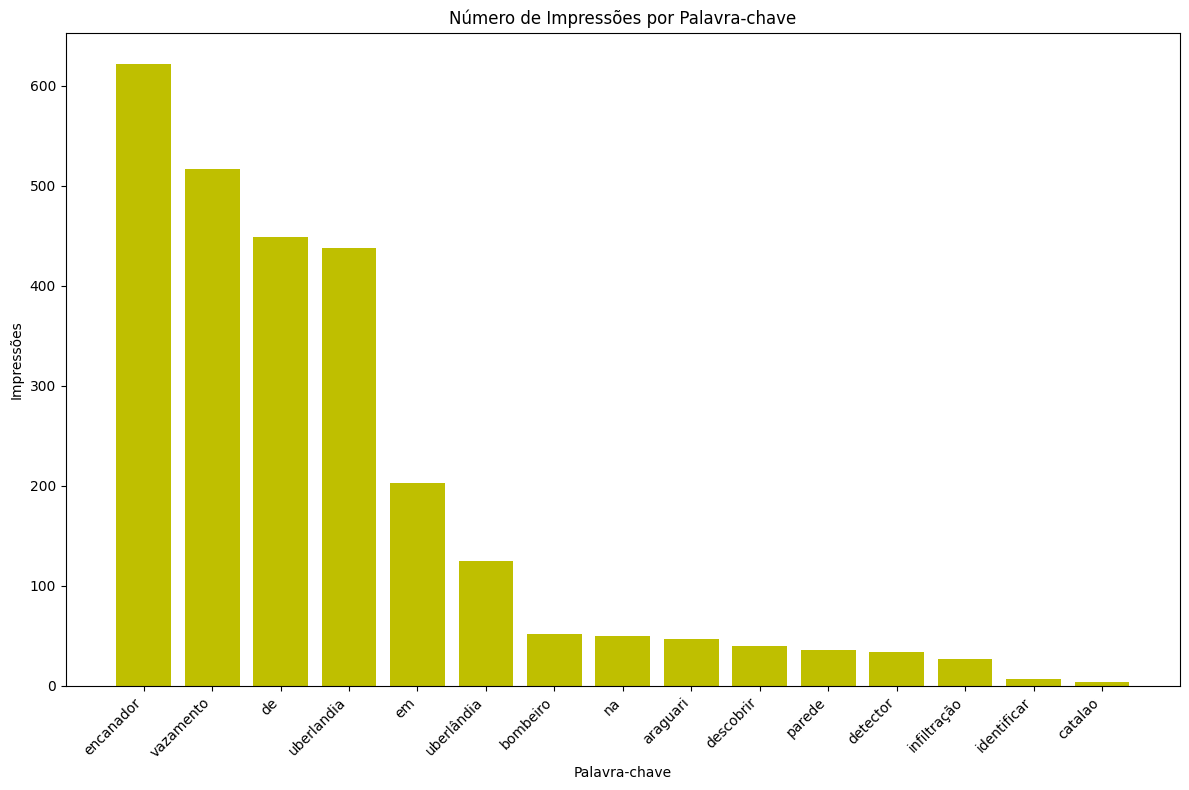

In [ ]:

# Ordenar as palavras-chave pelo número de impressões
pesquisa1 = pesquisa1.sort_values(by='Impressões', ascending=False)

# Limitar o número de palavras-chave para facilitar a visualização
pesquisa1 = pesquisa1.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(pesquisa1['Palavra'], pesquisa1['Impressões'], color='y')
plt.xlabel('Palavra-chave')
plt.ylabel('Impressões')
plt.title('Número de Impressões por Palavra-chave')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




---


## Dados de Pesquisa 2

In [ ]:
pesquisa2 = pd.read_csv('Dados/Pesquisas2.csv')

In [ ]:
pesquisa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pesquisar   300 non-null    object
 1   Custo       300 non-null    object
 2   Cliques     300 non-null    int64 
 3   Impressões  300 non-null    int64 
 4   Conversões  300 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.8+ KB


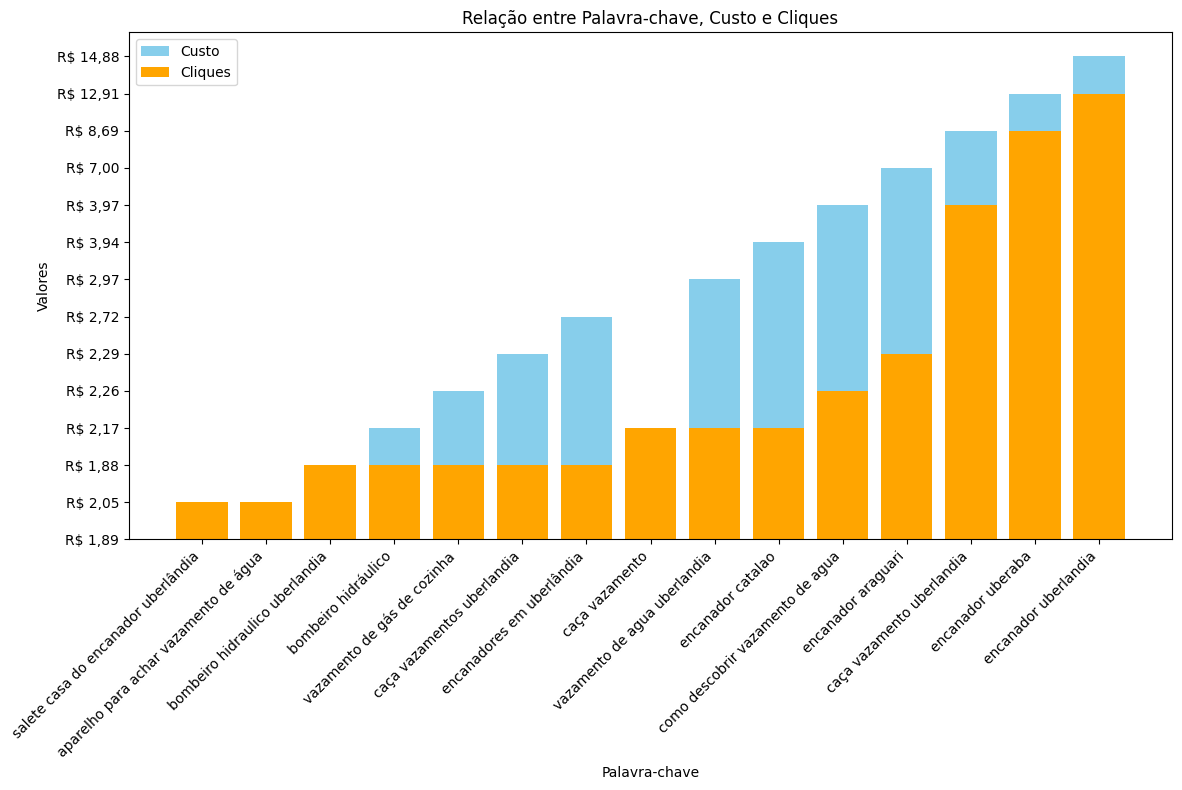

In [ ]:

# Ordenar os dados por custo em ordem decrescente
pesquisa2 = pesquisa2.sort_values(by='Custo')
pesquisa2 = pesquisa2.sort_values(by='Cliques')

# Limitar o número de palavras-chave para facilitar a visualização
pesquisa2 = pesquisa2.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(pesquisa2['Pesquisar'], pesquisa2['Custo'], color='skyblue', label='Custo')
plt.bar(pesquisa2['Pesquisar'], pesquisa2['Cliques'], color='orange', label='Cliques')

# Adicionar legendas e rótulos
plt.xlabel('Palavra-chave')
plt.ylabel('Valores')
plt.title('Relação entre Palavra-chave, Custo e Cliques')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()





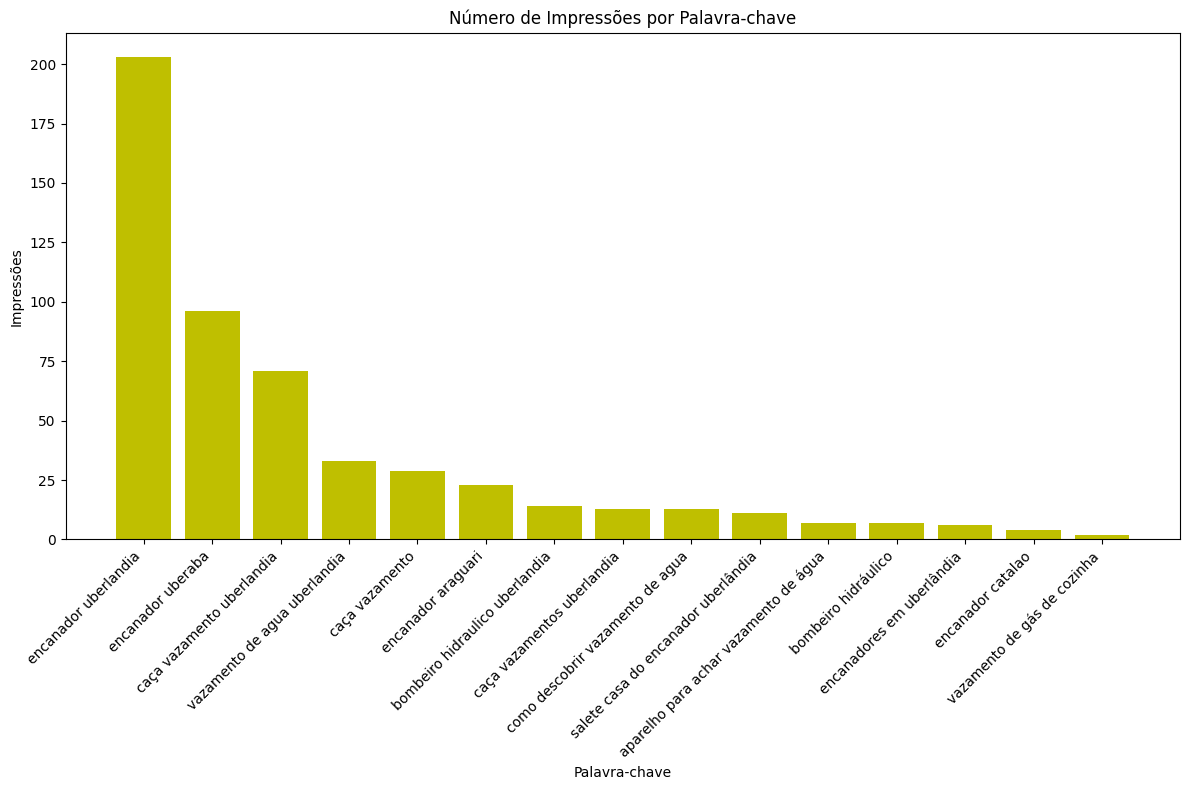

In [ ]:
# Ordenar as palavras-chave pelo número de impressões
pesquisa2 = pesquisa2.sort_values(by='Impressões', ascending=False)

# Limitar o número de palavras-chave para facilitar a visualização
pesquisa2 = pesquisa2.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(pesquisa2['Pesquisar'], pesquisa2['Impressões'], color='y')
plt.xlabel('Palavra-chave')
plt.ylabel('Impressões')
plt.title('Número de Impressões por Palavra-chave')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
